In [25]:
import matplotlib.pyplot as plt
import numpy as np

SCENARIO = "PUBLIC UNSIGNED"

In [20]:
filename = "./old/PUBLIC_OLD.csv"
file = open(filename, "r")

lines = file.readlines()

# lists for incremental delays and offsets
m_burst = []    # list of tuples
delay_inc = []
offset_inc = []

# lists for ntp update values
delay_up = []
offset_up = []
m_pair = []

for line in lines:
    tokens = line.split()

    # not a NTP update calculation
    if(len(tokens) == 6):
        message_pair = int(tokens[0])
        burst = int(tokens[1])

        delay_s = int(tokens[2])
        delay_f = int(tokens[3])

        offset_s = int(tokens[4])
        offset_f = int(tokens[5])
        
        delay_inc.append([delay_s, delay_f])
        offset_inc.append([offset_s, offset_f])
        m_burst.append([burst, message_pair])

    else:
        message_pair = int(tokens[0])

        delay_s = int(tokens[1])
        delay_f = int(tokens[2])

        offset_s = int(tokens[3])
        offset_f = int(tokens[4])

        delay_up.append([delay_s, delay_f])
        offset_up.append([offset_s, offset_f])
        m_pair.append(message_pair)

In [21]:

# for delay/offset, only care about fractional component
i_delay_f = []
i_offset_f = []
i_x = []

u_delay_f = []
u_offset_f = []
u_x = []

for i in range(len(delay_inc)):
    if(i % 8 == 0):
        i_x.append(i)
    i_delay_f.append(delay_inc[i][1])
    i_offset_f.append(offset_inc[i][1])

for i in range(len(delay_up)):
    u_x.append(i)
    u_delay_f.append(delay_up[i][1])
    u_offset_f.append(offset_up[i][1])

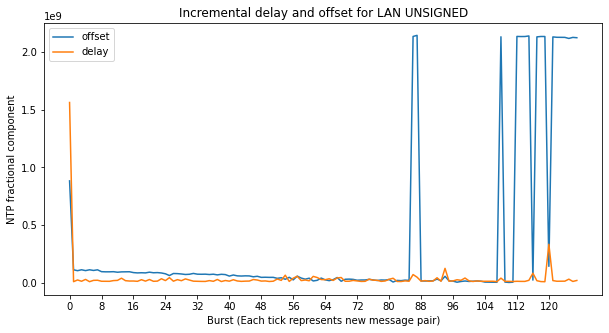

In [26]:
# print(i_offset_f)
plt.figure(figsize=(10,5))
plt.plot(i_offset_f, label="offset")
plt.plot(i_delay_f, label="delay")
plt.xticks(i_x)

plt.ylabel('NTP fractional component')
plt.xlabel('Burst (Each tick represents new message pair)')

title = "Incremental delay and offset for " + SCENARIO
plt.title(title)
plt.legend()

Text(0.5, 1.0, 'Updated offset for LAN UNSIGNED')

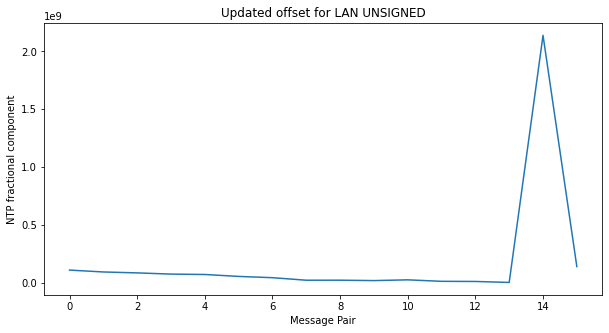

In [27]:
plt.figure(figsize=(10,5))
plt.plot(u_offset_f, label="offset")
# plt.plot(u_delay_f, label="delay")
plt.ylabel('NTP fractional component')
plt.xlabel('Message Pair')
title = "Updated offset for " + SCENARIO
plt.title(title)

Text(0.5, 1.0, 'Updated delay for LAN UNSIGNED')

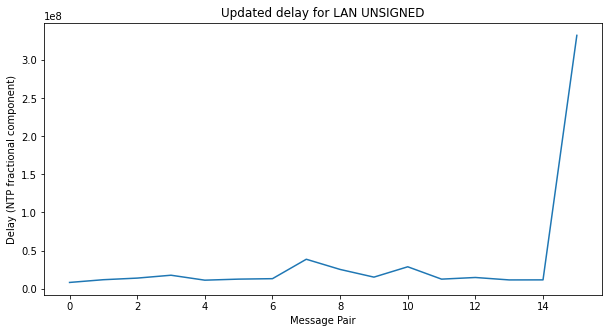

In [28]:
plt.figure(figsize=(10,5))
plt.plot(u_delay_f)
plt.ylabel('Delay (NTP fractional component)')
plt.xlabel('Message Pair')

title = "Updated delay for " + SCENARIO
plt.title(title)

In [32]:
print(u_delay_f)

[8057358, 11652246, 13761075, 17540646, 11038067, 12421045, 13013751, 38534448, 25155623, 15045270, 28647432, 12403865, 14572824, 11368778, 11433203, 332782656]
